In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
import numpy as np
import pandas as pd 

In [3]:
data_df = pd.read_csv('./auto-mpg.csv', header=0, engine='python')

print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data_df = data_df.drop(['car_name','origin'], axis=1, inplace=False)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.811683812593389
0.7983345128838719


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

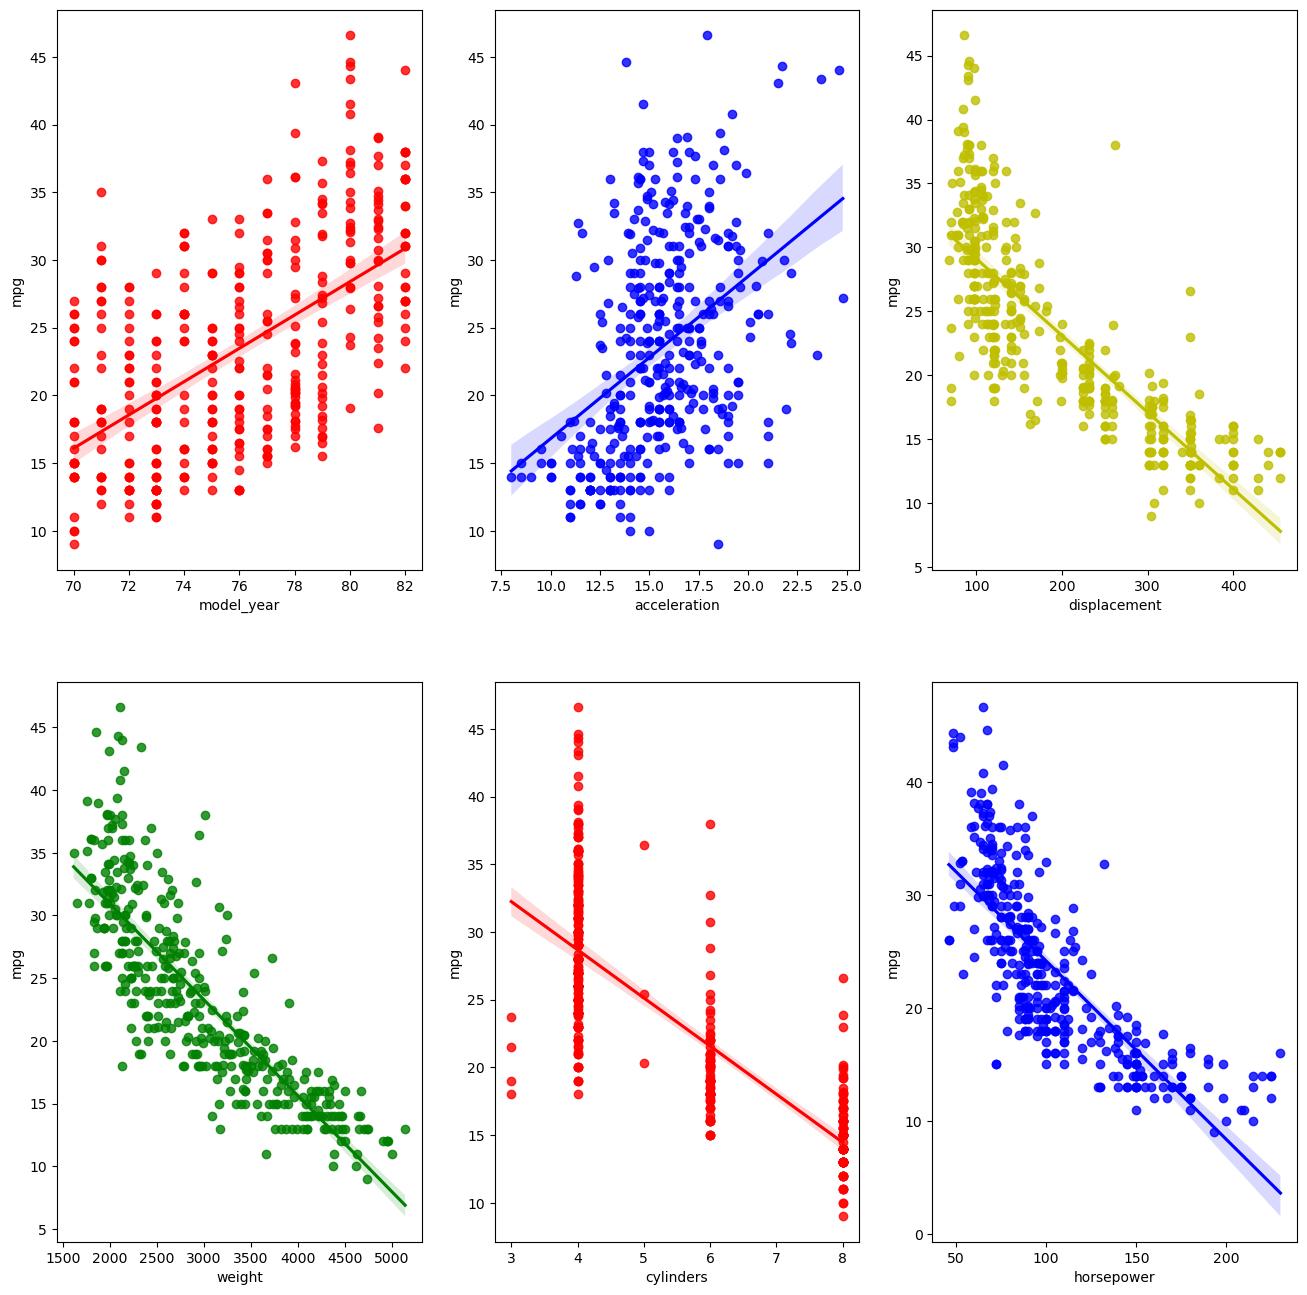

In [13]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders','horsepower']
plot_color = ['r', 'b', 'y', 'g', 'r','b']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

(274, 27)


In [16]:
poly.get_feature_names_out()

array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'cylinders^2',
       'cylinders displacement', 'cylinders horsepower',
       'cylinders weight', 'cylinders acceleration',
       'cylinders model_year', 'displacement^2',
       'displacement horsepower', 'displacement weight',
       'displacement acceleration', 'displacement model_year',
       'horsepower^2', 'horsepower weight', 'horsepower acceleration',
       'horsepower model_year', 'weight^2', 'weight acceleration',
       'weight model_year', 'acceleration^2', 'acceleration model_year',
       'model_year^2'], dtype=object)

In [17]:
lr.fit(X_train_poly, Y_train)
print(lr.score(X_train_poly, Y_train))
print(lr.score(X_test_poly, Y_test))

0.8847009937100931
0.8824080331334024


In [23]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
input_data = [[]]
input_data[0].append(int(input("cylinders : ")))
input_data[0].append(int(input("displacement : ")))
input_data[0].append(int(input("horsepower")))
input_data[0].append(int(input("weight : ")))
input_data[0].append(int(input("acceleration : ")))
input_data[0].append(int(input("model_year : ")))

연비를 예측하고 싶은 차의 정보를 입력해주세요.


cylinders :  8
displacement :  400
horsepower 150
weight :  3000
acceleration :  12
model_year :  90


In [24]:
input_data_poly = poly.transform(input_data)

mpg_predict = lr.predict(input_data_poly)
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 38.46 입니다.
